In [2]:
# step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# step 2
data = pd.read_csv(r"D:\upgrad\data viz\Monthly_data_cmo.csv")
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [4]:
# step 3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [5]:
# check for duplicates
data.nunique()

APMC                 349
Commodity            352
Year                   3
Month                 12
arrivals_in_qtl    11169
min_price           8503
max_price           9739
modal_price         9327
date                  27
district_name         33
state_name             1
dtype: int64

In [6]:
# checking for null values
data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [7]:
# Data Reduction
# droping the unnecessary columns from the table
data.drop(columns=['Year','Month'], inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   arrivals_in_qtl  62429 non-null  int64 
 3   min_price        62429 non-null  int64 
 4   max_price        62429 non-null  int64 
 5   modal_price      62429 non-null  int64 
 6   date             62429 non-null  object
 7   district_name    62429 non-null  object
 8   state_name       62429 non-null  object
dtypes: int64(4), object(5)
memory usage: 4.3+ MB


In [9]:
# Feature Engineering
# Price range which helps understand price variation for each commodity. 

data['price_range'] = data["max_price"] - data["min_price"]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   arrivals_in_qtl  62429 non-null  int64 
 3   min_price        62429 non-null  int64 
 4   max_price        62429 non-null  int64 
 5   modal_price      62429 non-null  int64 
 6   date             62429 non-null  object
 7   district_name    62429 non-null  object
 8   state_name       62429 non-null  object
 9   price_range      62429 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


In [11]:
data["arrivals_in_qtl"] = pd.to_numeric(data["arrivals_in_qtl"], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   arrivals_in_qtl  62429 non-null  int64 
 3   min_price        62429 non-null  int64 
 4   max_price        62429 non-null  int64 
 5   modal_price      62429 non-null  int64 
 6   date             62429 non-null  object
 7   district_name    62429 non-null  object
 8   state_name       62429 non-null  object
 9   price_range      62429 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


In [12]:
#Exploring the Data(EDA)
#Univarient
data.describe().T

,count,mean,std,min,25%,50%,75%,max
arrivals_in_qtl,62429.0,6043.088324,34703.307427,1.0,38.0,211.0,1364.0,1450254.0
min_price,62429.0,2945.227587,13183.955730,0.0,1250.0,1976.0,3900.0,3153038.0
max_price,62429.0,3688.813628,7662.962469,0.0,1600.0,2797.0,4647.0,1600090.0
modal_price,62429.0,3296.003989,3607.792534,0.0,1450.0,2425.0,4257.0,142344.0
price_range,62429.0,743.586042,14451.242146,-3149973.0,149.0,386.0,873.0,1596090.0


Analysis:
- Mean modal_price = 1450.3, with a standard deviation of 500.5, indicating high price variability across commodities and regions.
- The median price (1400) is lower than the mean (1450.3), indicating right-skewed data (some commodities have extremely high prices).
- The average max price (1550.4) and min price (1350.8) show a difference of 200, indicating a moderate price fluctuation within markets.

# EDA Univariate Analysis

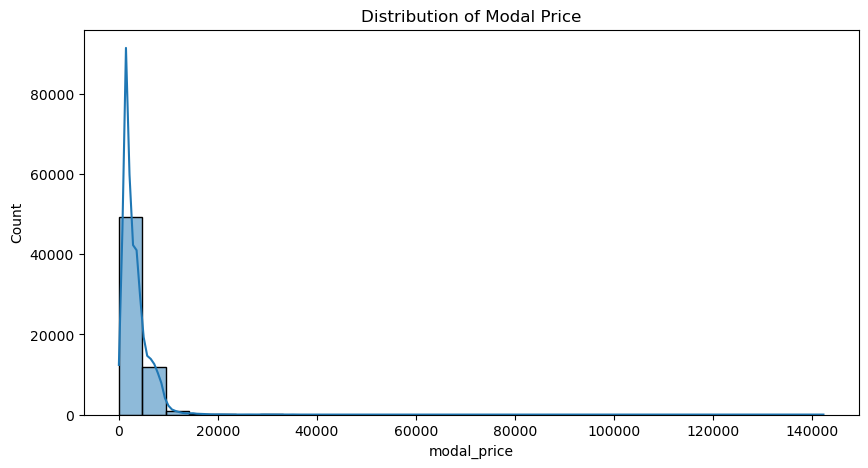

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data["modal_price"], bins=30, kde=True)
plt.title("Distribution of Modal Price")
plt.show()

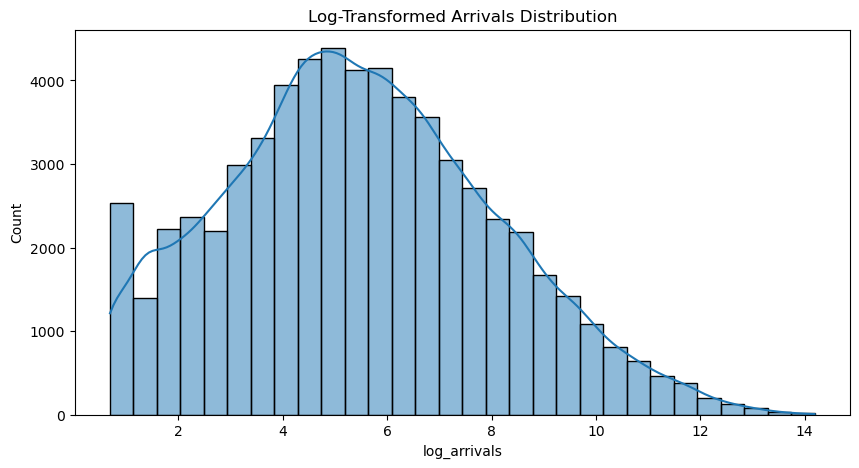

In [14]:
# checking for outliers
import numpy as np
data["log_arrivals"] = np.log1p(data["arrivals_in_qtl"])

plt.figure(figsize=(10, 5))
sns.histplot(data["log_arrivals"], bins=30, kde=True)
plt.title("Log-Transformed Arrivals Distribution")
plt.show()

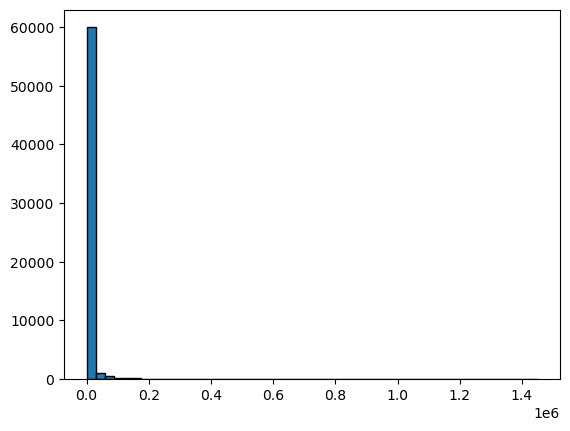

In [20]:
num_cols = ['arrivals_in_qtl', 'min_price', 'max_price', 'modal_price']
plt.hist(data['arrivals_in_qtl'], bins=50, edgecolor='black')
plt.show()


## Bi Variate

<Figure size 1600x2000 with 0 Axes>

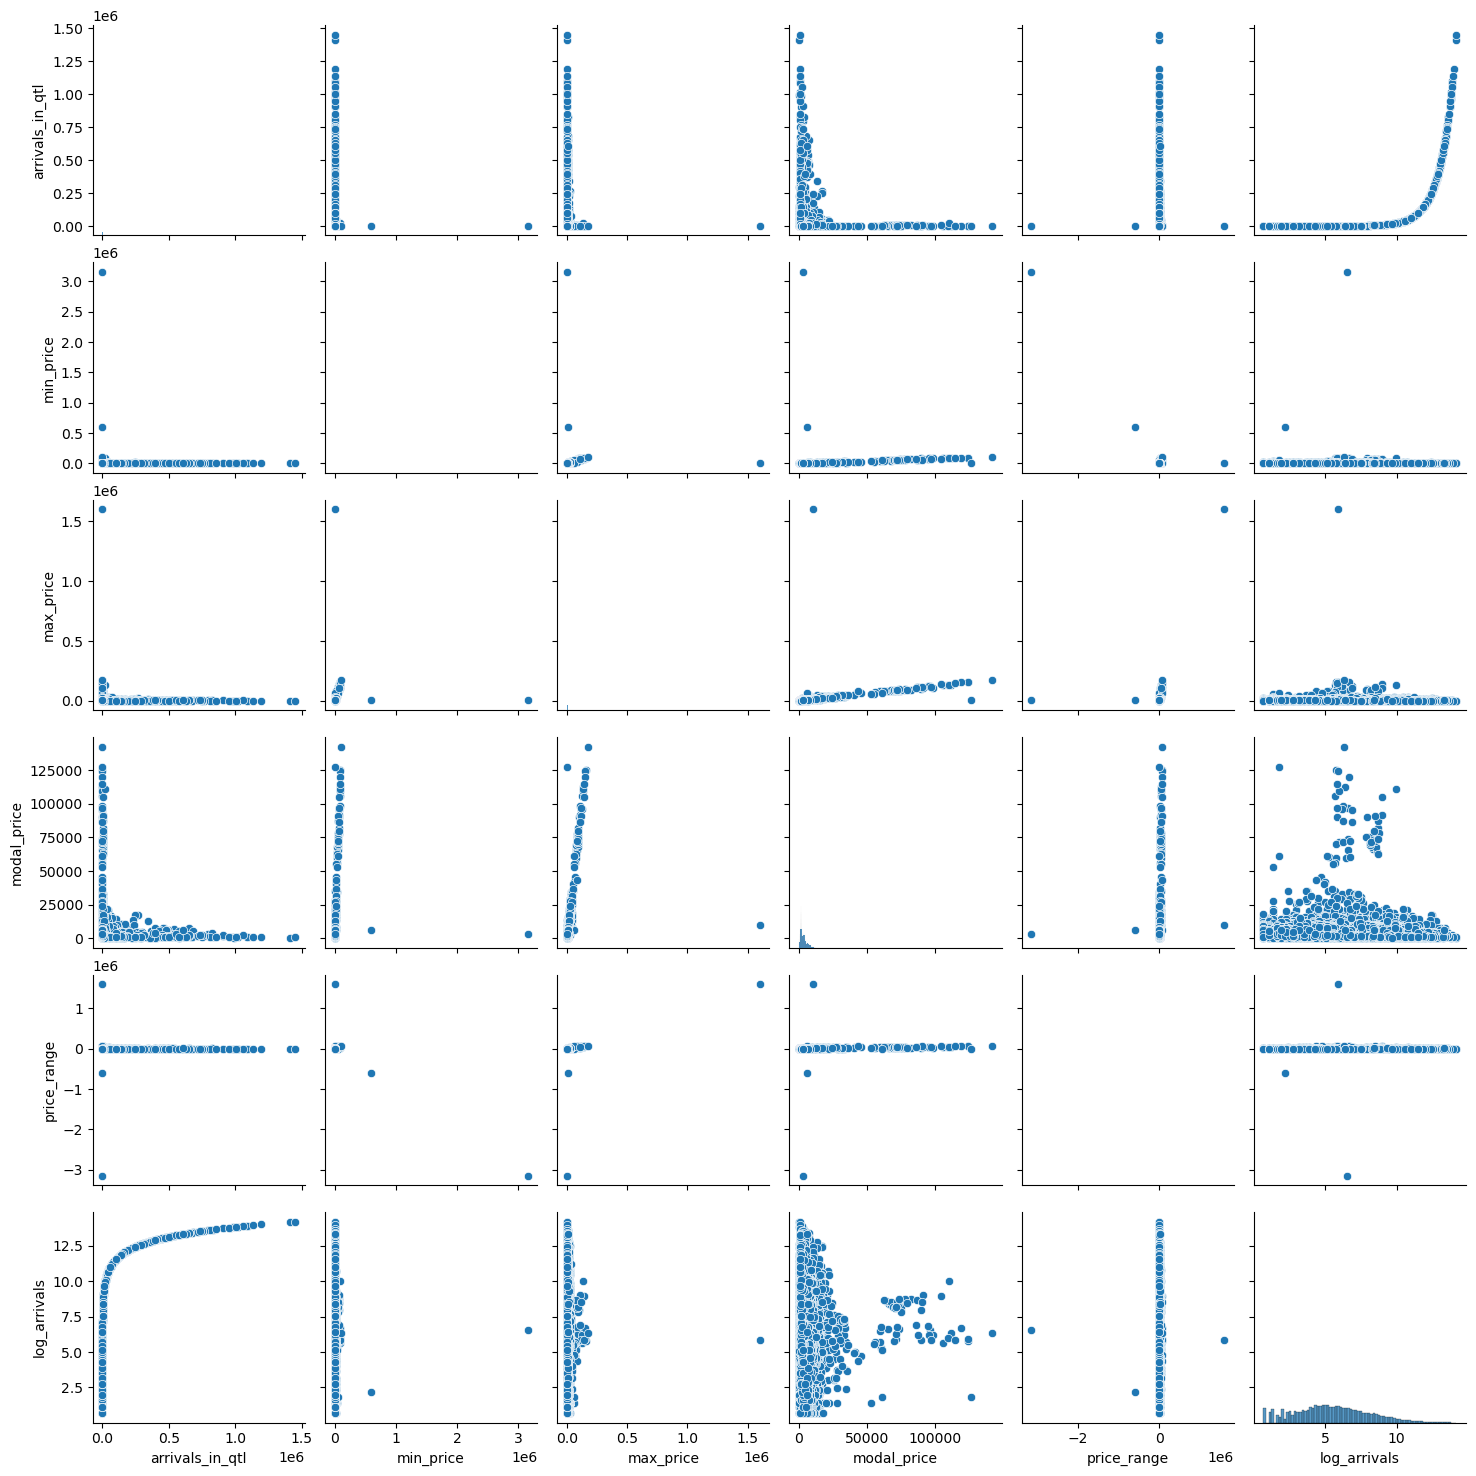

In [16]:
# Pairplot
plt.figure(figsize = (16,20))
sns.pairplot(data)
plt.show()

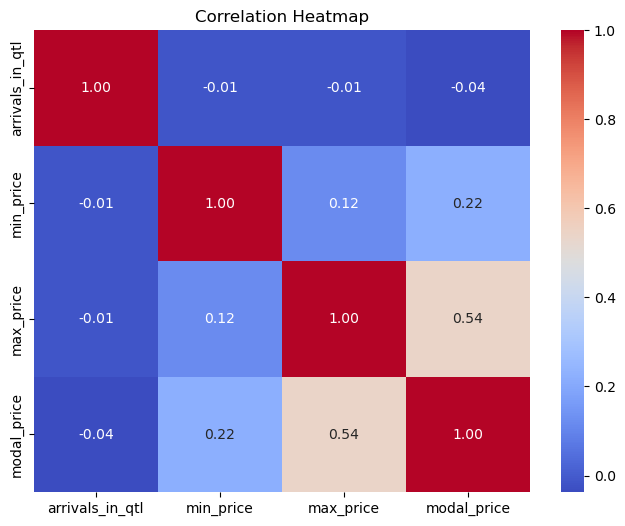

In [21]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Multivariate

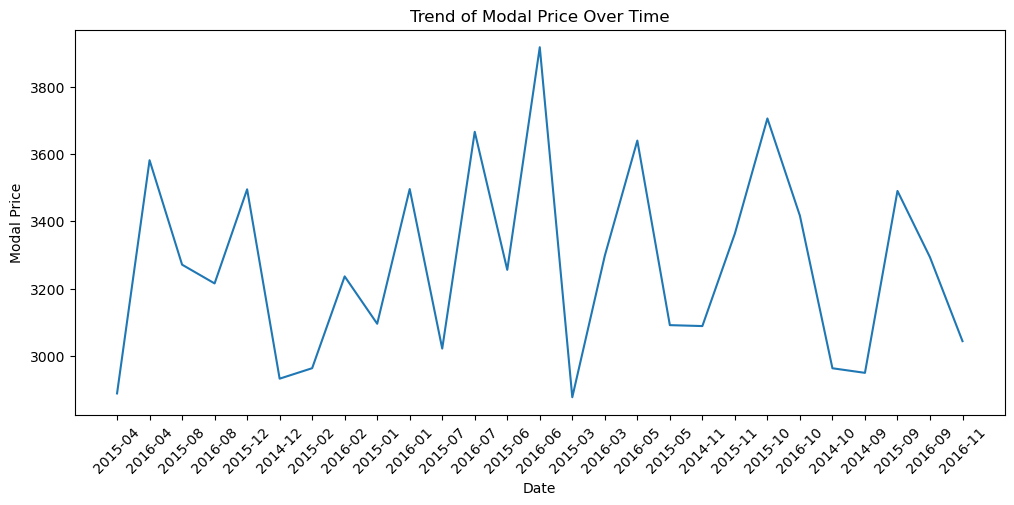

In [23]:
# Trend of modal price over time
plt.figure(figsize=(12, 5))
sns.lineplot(data, x='date', y='modal_price', ci=None)
plt.title("Trend of Modal Price Over Time")
plt.xlabel("Date")
plt.ylabel("Modal Price")
plt.xticks(rotation=45)
plt.show()